**NGUYỄN HỮU THUẬN 19146400**

In [6]:
from keras.layers.core.dropout import Dropout
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
import cv2

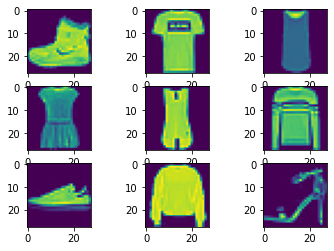

Kích thước x_train:  (60000, 28, 28)
Kích thước y_train:  (60000,)
Kích thước x_test:  (10000, 28, 28)
Kích thước y_test:  (10000,)


In [ ]:
#Chia dữ liệu
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
plt.show()
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

In [ ]:
#Chuẩn hóa dữ liệu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

Kích thước x_train:  (60000, 28, 28)
Kích thước y_train:  (60000, 10)
Kích thước x_test:  (10000, 28, 28)
Kích thước y_test:  (10000, 10)


In [ ]:
#tao 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [5]:
#tao modle
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#train 
history = model.fit(x_train, y_train, batch_size=128,epochs=20,
                    validation_data = (x_test, y_test), verbose=1)      
#luu model
model.save('NHT_FSMnist.h5')

Epoch 1/20
469/469 [==============================] - 29s 61ms/step - loss: 0.5221 - accuracy: 0.8135 - val_loss: 0.4025 - val_accuracy: 0.8551
Epoch 2/20
469/469 [==============================] - 26s 56ms/step - loss: 0.3526 - accuracy: 0.8761 - val_loss: 0.3431 - val_accuracy: 0.8764
Epoch 3/20
469/469 [==============================] - 26s 56ms/step - loss: 0.3078 - accuracy: 0.8903 - val_loss: 0.3274 - val_accuracy: 0.8783
Epoch 4/20
469/469 [==============================] - 26s 56ms/step - loss: 0.2791 - accuracy: 0.9001 - val_loss: 0.3060 - val_accuracy: 0.8885
Epoch 5/20
469/469 [==============================] - 26s 56ms/step - loss: 0.2579 - accuracy: 0.9068 - val_loss: 0.3344 - val_accuracy: 0.8791
Epoch 6/20
469/469 [==============================] - 26s 56ms/step - loss: 0.2398 - accuracy: 0.9143 - val_loss: 0.2924 - val_accuracy: 0.8956
Epoch 7/20
469/469 [==============================] - 26s 56ms/step - loss: 0.2262 - accuracy: 0.9185 - val_loss: 0.2771 - val_accuracy:

In [ ]:
#load model 
from tensorflow import keras
model = keras.models.load_model('NHT_Cifar10.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

Sai số kiểm tra là:  0.27396854758262634
Độ chính xác kiểm tra là:  0.9124000072479248


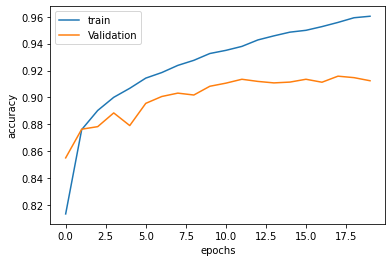

In [7]:
#ve do thi
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
class_names=['concho','conmeo','conga']

In [ ]:
img_path = '../content/concho.jpg'
plt.imshow(load_img(img_path))
img = cv2.imread(img_path)
new_img = cv2.resize(img, (256, 256))
new_img = np.reshape(new_img, [1, 256, 256, 3])

In [ ]:
# example of converting an image with the Keras API
from keras.preprocessing import image 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from json import load

img=load_img('concho.jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
convat=np.argmax(model.predict(img),axis=1)

In [ ]:
pred = model.predict(img)
print(np.argmax(pred))

3
concho
